# question 1

### جمع آوری و آماده سازی دیتا

In [117]:
import pandas as pd
df = pd.read_csv("iris.data",header=None)
df.columns = ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)","species"]
pd.set_option("display.float_format","{:.2f}".format)
print(df.head())
print(df.info())
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0               5.10              3.50               1.40              0.20   
1               4.90              3.00               1.40              0.20   
2               4.70              3.20               1.30              0.20   
3               4.60              3.10               1.50              0.20   
4               5.00              3.60               1.40              0.20   

       species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.11,0.87,0.82
sepal width (cm),-0.11,1.00,-0.42,-0.36
petal length (cm),0.87,-0.42,1.00,0.96
petal width (cm),0.82,-0.36,0.96,1.00


### افزودن ویژگی جدید به دیتافریم

In [118]:
df["petal_ratio"] = df["petal length (cm)"]/df["petal width (cm)"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal_ratio
0,5.10,3.50,1.40,0.20,Iris-setosa,7.00
1,4.90,3.00,1.40,0.20,Iris-setosa,7.00
2,4.70,3.20,1.30,0.20,Iris-setosa,6.50
3,4.60,3.10,1.50,0.20,Iris-setosa,7.50
4,5.00,3.60,1.40,0.20,Iris-setosa,7.00


### مصور سازی داده ها

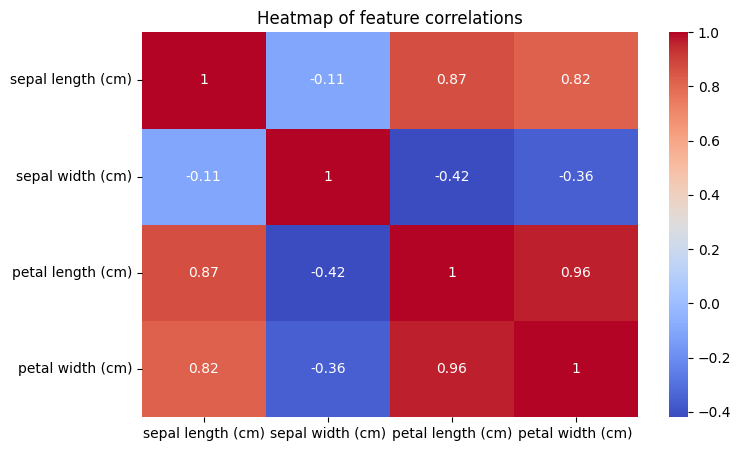

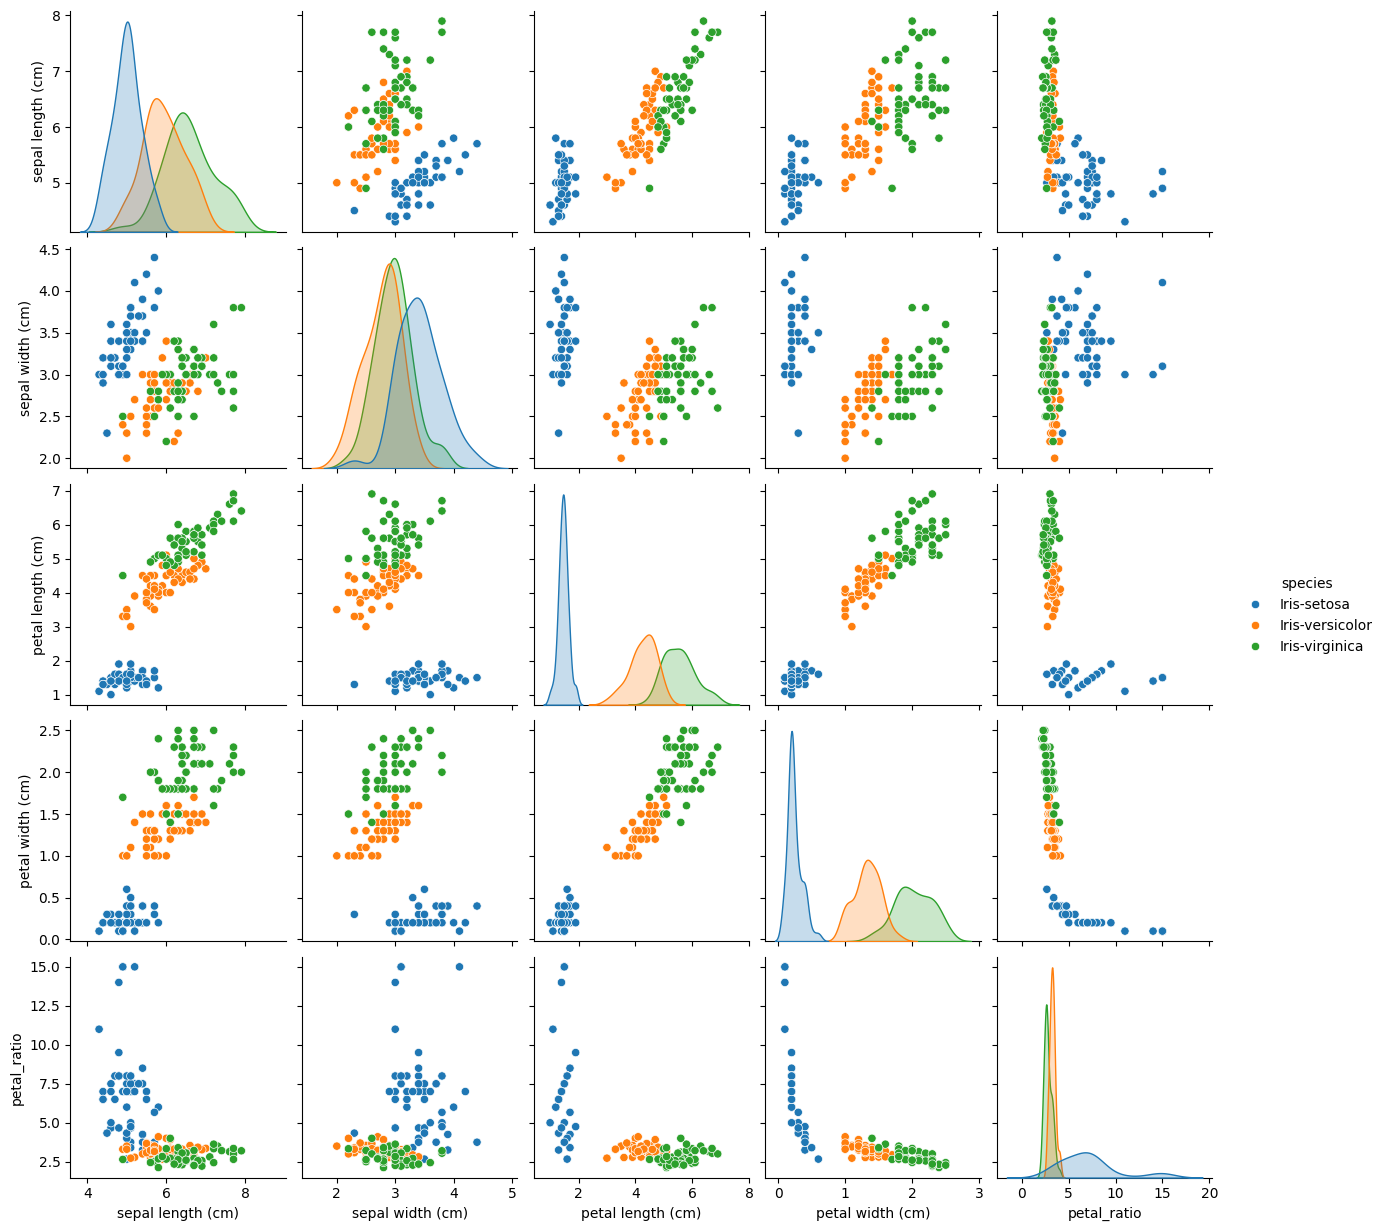

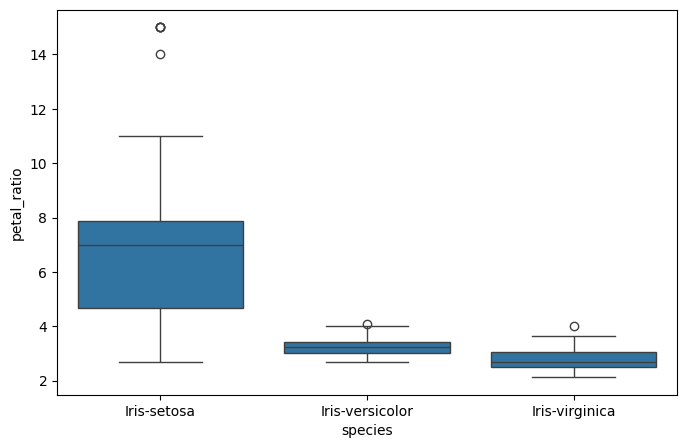

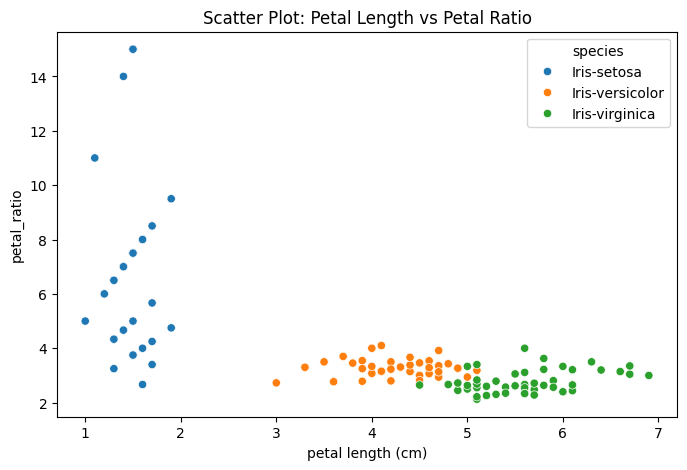

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
# ترسیم هیت مپ 
plt.figure(figsize=(8,5))
sns.heatmap(data= correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Heatmap of feature correlations")
plt.show()
#ترسیم pair plot
sns.pairplot(df,hue="species")
plt.show()
#ترسیم boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="species",y="petal_ratio",data= df)
plt.show()
#ترسیم اسکتر 
plt.figure(figsize=(8,5))
sns.scatterplot(x="petal length (cm)", y="petal_ratio", hue="species", data=df)
plt.title("Scatter Plot: Petal Length vs Petal Ratio")
plt.show()


### تحلیل نمودار ها 

ویژگی جدید یانسبت طول بر عرض گلبرگ : این ویژگی بین سه گونه ستوسا، ورسی کالر و ورجینیکا تفاوت خوبی ایجاد میکند چرا که ستوسا عرض گلبرگ کمی دارد پس نسبت طول بر عرض آن عدد بزرگ تری است ولی دو گونه دیگر عرض کمتری در گلبرگ دارند پس نسب آنها حداکثر تا عدد چهار پیش رفته ولی طول بیشتر دارند ؛ در این حالت گونه ها به وضوح از هم تفکیک شده اند 

بله رابطه بین طول و نسبت گلبرگ وجود دارد : وقتی در گونه ای مثل ستوسا عرض گلبرگ کم است این باعث میشود معمولا نسبت های بزرگ تری داشته باشیم ولی در دو گونه ورسی کالر و ورجینیکا اینطور نیست پس نسبت ها متوسط باقی میمونه چون هم طول گلبرگ ها هم عرض آنها نزدیک تر به هم است 

کوچکترین گلبرگ و بزرگ ترین نسبت طول و عرض متعلق به گونه ستوسا هست
ورسی کالر بین این دو گونه قرار داره و نسبت طول و عرض متعادلی داره و گل برگ های بزرگ تری هم نسبت به ستوسا داره 
ورجینیکا هم کوچکترین نسبت طول و عرض رو داره و بزرگ ترین گلبرگ در بین این سه گونه رو داره 

# چالش داده های اقلیمی 

بارگذاری دیتاست

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) بارگذاری دیتاست
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df["dt"] = pd.to_datetime(df["dt"])
df = df.sort_values(by="dt")

df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.38,2.29,Åland
460204,1743-11-01,5.15,2.56,Serbia
289418,1743-11-01,0.94,2.09,Latvia
237217,1743-11-01,5.04,2.37,Hungary
206656,1743-11-01,10.81,2.13,Greece


پر کردن Nan

In [121]:

grouped = df.groupby("Country")

def fill_missing(group):
    group = group.sort_values("dt").copy()
    group["AverageTemperature"] = group["AverageTemperature"].fillna(
        group["AverageTemperature"].rolling(window=60, min_periods=1, center=True).mean()
    )
    group["AverageTemperatureUncertainty"] = group["AverageTemperatureUncertainty"].fillna(
        group["AverageTemperatureUncertainty"].rolling(window=60, min_periods=1, center=True).mean()
    )
    return group

df_filled = grouped.apply(fill_missing).reset_index(drop=True)

# 3) افزودن ستون year و decade
df_filled["year"] = df_filled["dt"].dt.year
df_filled["decade_start"] = (df_filled["year"] // 10) * 10
df_filled["decade"] = df_filled["decade_start"].astype(str) + "s"

# 4) فیلتر کشورهایی با حداقل 100 سال داده
country_year_counts = (
    df_filled.dropna(subset=["AverageTemperature"]).groupby("Country")["year"].nunique()
    
)
valid_countries = country_year_counts[country_year_counts >= 100].index
df_clean = df_filled[df_filled["Country"].isin(valid_countries)].copy()


C:\Users\S.Amir Mahdi\AppData\Local\Temp\ipykernel_21188\3731731460.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = grouped.apply(fill_missing).reset_index(drop=True)


تحلیل عددی

In [122]:

# میانگین جهانی سالانه
global_yearly = (
    df_clean.groupby("year")["AverageTemperature"].mean().rename("GlobalTemp")
    .reset_index()
)

# میانگین دهه‌ای جهانی
global_decadal = (
    df_clean.groupby("decade")["AverageTemperature"].mean().rename("GlobalTempDecade")
    .reset_index()
)

# ماتریس anomaly
country_decadal = (
    df_clean.groupby(["Country", "decade"])["AverageTemperature"].mean().reset_index()
)
country_decadal = country_decadal.merge(global_decadal, on="decade", how="left")
country_decadal["Anomaly"] = country_decadal["AverageTemperature"] - country_decadal["GlobalTempDecade"]
anomaly_matrix = country_decadal.pivot(index="decade", columns="Country", values="Anomaly")
def decade_to_int(d):
    return int(d[:-1])
sorted_decades = sorted(anomaly_matrix.index, key=decade_to_int)
anomaly_matrix = anomaly_matrix.loc[sorted_decades]
# روند خطی دما
x_decade = np.array([decade_to_int(d) for d in global_decadal["decade"]])
y_decade = global_decadal["GlobalTempDecade"].values
m, b = np.polyfit(x_decade, y_decade, 1)
warming_rate_per_decade = m * 10
print(f"Warming rate (°C per decade): {warming_rate_per_decade:.3f}")

# پیش‌ بینی تا 2050
last_decade_start = x_decade.max()
future_years = np.arange(last_decade_start, 2051)
y_base = m * future_years + b
y_optimistic = (m * 0.7) * future_years + b
y_pessimistic = (m * 1.5) * future_years + b

Warming rate (°C per decade): 0.487


مصور سازی

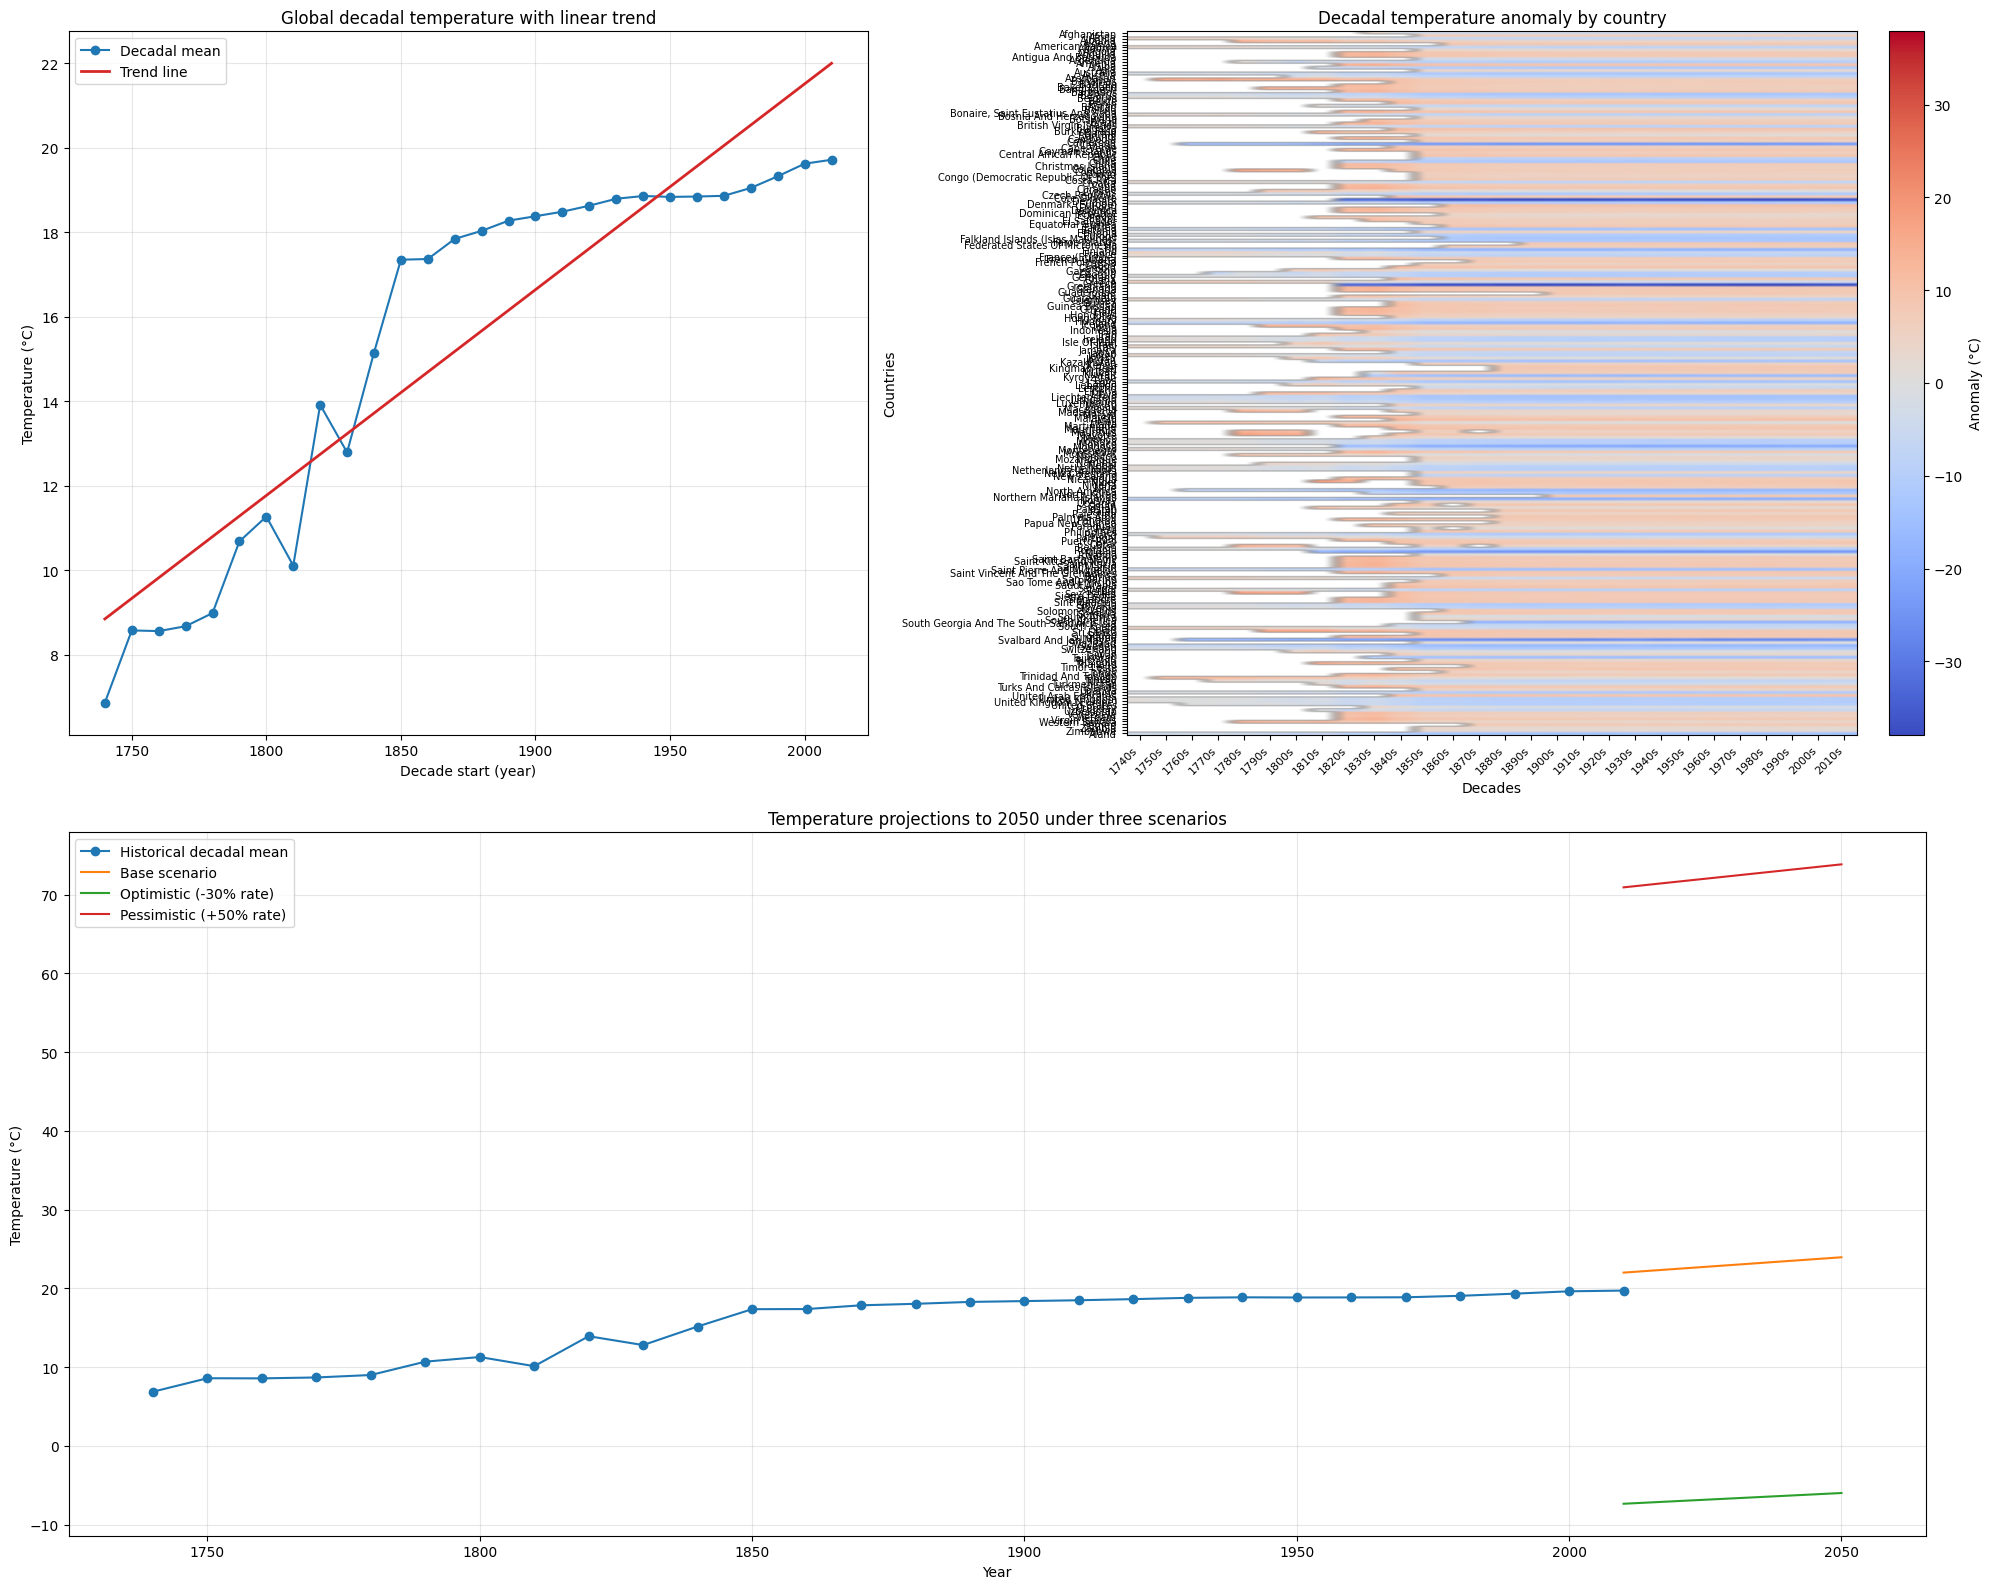

In [123]:
plt.figure(figsize=(20, 16))

# Subplot 1: دما + خط روند
ax1 = plt.subplot(2, 2, 1)
ax1.plot(x_decade, y_decade, marker='o', linestyle='-', color='tab:blue', label='Decadal mean')
ax1.plot(x_decade, m * x_decade + b, color='tab:red', linewidth=2, label='Trend line')
ax1.set_title('Global decadal temperature with linear trend')
ax1.set_xlabel('Decade start (year)')
ax1.set_ylabel('Temperature (°C)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Heatmap anomaly
ax2 = plt.subplot(2, 2, 2)
im = ax2.imshow(anomaly_matrix.values.T, aspect='auto', cmap='coolwarm',
                vmin=-np.nanmax(np.abs(anomaly_matrix.values)),
                vmax=np.nanmax(np.abs(anomaly_matrix.values)))
ax2.set_title('Decadal temperature anomaly by country')
ax2.set_xlabel('Decades')
ax2.set_ylabel('Countries')
ax2.set_xticks(np.arange(len(anomaly_matrix.index)))
ax2.set_xticklabels(anomaly_matrix.index, rotation=45, ha='right', fontsize=8)
ax2.set_yticks(np.arange(len(anomaly_matrix.columns)))
ax2.set_yticklabels(anomaly_matrix.columns, fontsize=7)
cbar = plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
cbar.set_label('Anomaly (°C)')
# Subplot 3: سه سناریو تا 2050
ax3 = plt.subplot(2, 1, 2)
ax3.plot(x_decade, y_decade, marker='o', linestyle='-', color='tab:blue', label='Historical decadal mean')
ax3.plot(future_years, y_base, color='tab:orange', label='Base scenario')
ax3.plot(future_years, y_optimistic, color='tab:green', label='Optimistic (-30% rate)')
ax3.plot(future_years, y_pessimistic, color='tab:red', label='Pessimistic (+50% rate)')
ax3.set_title('Temperature projections to 2050 under three scenarios')
ax3.set_xlabel('Year')
ax3.set_ylabel('Temperature (°C)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# question 3

خواندن داده و آماده سازی اولیه 

In [124]:
import pandas as pd
df =  pd.read_csv('reviews.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReviewText  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes


,ReviewText
0,This product is amazing and very useful!
1,I didn’t like the quality of the material.
2,Good value for money.
3,"Terrible experience, won’t buy again."
4,Absolutely loved it!


ساخت ستون text length, wordcount

In [125]:
df["text_length"] = df["ReviewText"].astype(str).apply(len)
df["word_count"] = df["ReviewText"].astype(str).apply(lambda x:len(x.split()))
df

,ReviewText,text_length,word_count
0,This product is amazing and very useful!,40,7
1,I didn’t like the quality of the material.,42,8
2,Good value for money.,21,4
3,"Terrible experience, won’t buy again.",37,5
4,Absolutely loved it!,20,3
5,The product broke after one week.,33,6
6,Really happy with the performance.,34,5
7,Not worth the price.,20,4
8,Excellent build quality and fast delivery.,42,6
9,Disappointing experience overall.,33,3


تحلیل فراوانی کلمات در کل داده 

In [ ]:
from collections import Counter
all_text = " ".join(df["ReviewText"].astype(str))
all_text= all_text.lower()
clean_text = all_text.replace("!","").replace(",","").replace(".","")
list_of_words = clean_text.split()
word_counts = Counter(list_of_words)
top_10 = word_counts.most_common(10)
new_df = pd.DataFrame(top_10,columns=["words","count"])
new_df

,words,count
0,the,5
1,product,2
2,and,2
3,quality,2
4,experience,2
5,this,1
6,is,1
7,amazing,1
8,very,1
9,useful,1


مصور سازی نتیجه

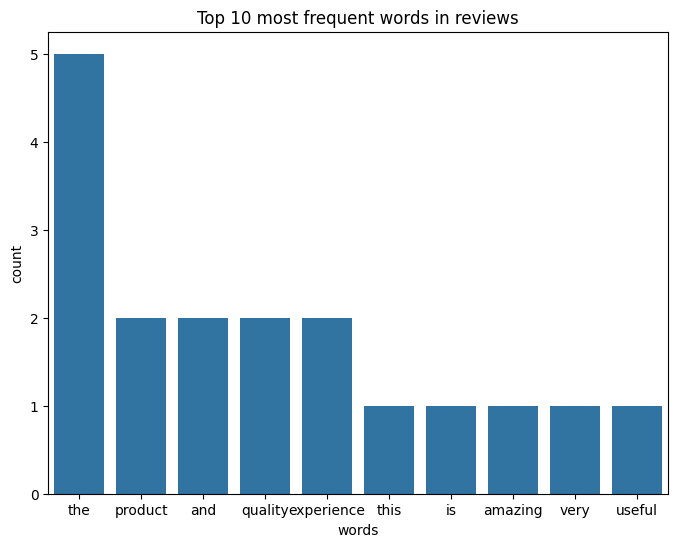

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x=new_df["words"],y=new_df["count"])
plt.title("Top 10 most frequent words in reviews")
plt.show()

کدام کلمات استفاده بیشتری داشتند؟ آیا معنای خاصی دارد؟ بله کلمه "the"و کلمات"product,and,quality,experience"نشان دهنده این است که بحث سر توصیف تجربه کاربران بر سر کیفیت و تجربه انها از محصولات است و سایر کلمات مثل (usefull,very,amazing)نشان دهنده رضایت اکثریت بوده 

آیا این تکرار ها نشان از رضایت داشته یا نا رضایتی ؟ نشان از رضایت داشته کلمات مثبت در توصیف محصولات بسیار استفاده شده و کلمات منفی مشاهده نمی شود 

استاپ ورد به معنی کلماتی مثل (is , this ,the,and)و حذف کردن آنها که اغلب معنا ندارند و تکرار زیادی دارند کمک کننده است ، همچنین حذف علامت های سجاوندی تا جای ممکن یا جستجو به دنبال کلمات مثبت خاص یا منفی خاص مثل (awful , nice )بسیار کمک کنند خواهد بود 

# question 4

بارگذاری و نمایش تصاویر چهره 

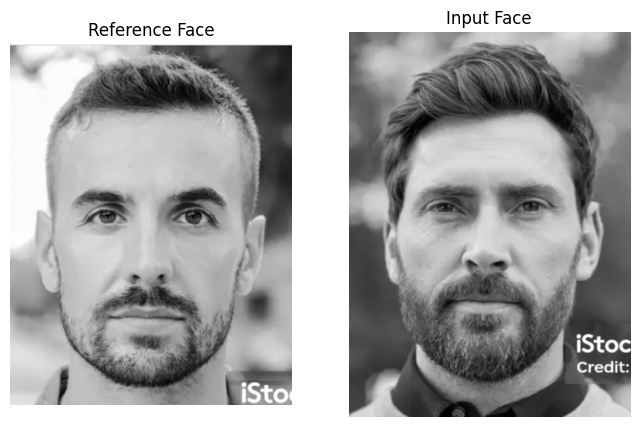

In [128]:
import matplotlib.pyplot as plt
import numpy as np
def to_grayscale(img):
    if len(img.shape)==3:
        gray =  np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
        return gray
    else:
        return img
img_ref = plt.imread("Screenshot 2025-11-20 154757.png")
img_input = plt.imread("Screenshot 2025-11-20 154912.png")
gray_ref = to_grayscale(img_ref)
gray_input= to_grayscale(img_input)
#نمایش تصویر مبدا
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(gray_ref, cmap="gray")
plt.title("Reference Face")
plt.axis("off")
#نمایش تصویری که قراره چک شه
plt.subplot(1,2,2)
plt.imshow(gray_input, cmap="gray")
plt.title("Input Face")
plt.axis("off")
plt.show()

تحلیل عددی تصویر با numpy

In [129]:
height, width = gray_ref.shape
gray_input_resize = gray_input[:height, :width]
mae = np.mean(np.abs(gray_ref - gray_input_resize))
print(f"mean absolute error {mae}")
mse = np.mean((gray_ref - gray_input_resize)** 2)
print(f"mean squared Error {mse}")

mean absolute error 0.2693108800345712
mean squared Error 0.11042743496587788


تعیین استانه برای تشخیص چهره 

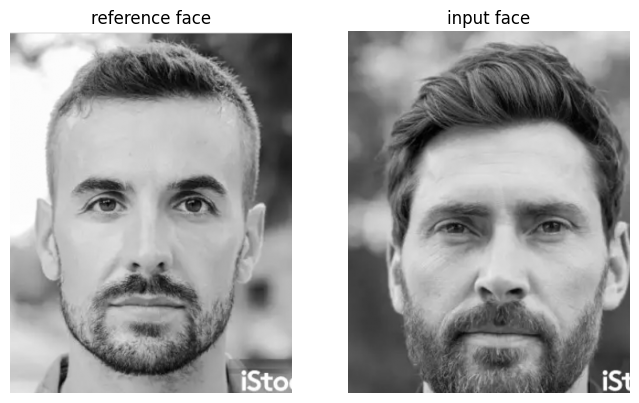

face unlock's result: face not matched mae= 0.269, mse= 0.110


In [130]:
flag_mae = 0.2
flag_mse = 0.1

if mae < flag_mae and mse < flag_mse:
    result="face matched"
else:
    result ="face not matched"

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(gray_ref,cmap="gray")
plt.title("reference face")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(gray_input_resize,cmap="gray")
plt.title("input face")
plt.axis("off")
plt.show()
print(f"face unlock's result: {result} mae= {mae:.3f}, mse= {mse:.3f}" )

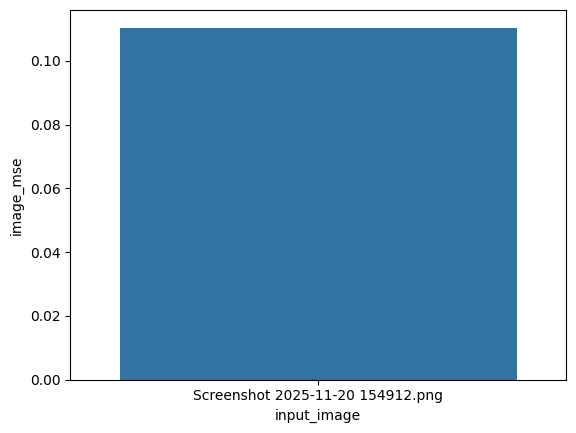

In [131]:
import pandas as pd 
import seaborn as sns
df =  pd.DataFrame({
    "input_image":["Screenshot 2025-11-20 154912.png"],
    "image_mse":mse,
    "image_mae":mae

})
df
sns.barplot(x=df["input_image"],y=df["image_mse"])
plt.show()

چقدر تفاوت بین تصاویر هست؟ میزانMAE برابر با 0.269 بود
میزان MSE برابر با 0.110 بود 
ولی استاندارد ما برای مچ بودن فیس ها 0.2 و0.1 بود پس 
فیس ها یکسان نیستن و شباهت کافی ندارند

بله بنده این سیستم رو با یک عکس متفاوت با رفرنس و با یک تصویر یکسان با رفرنس مقایسه کردم و فقط زمانی که تصویر از استاندارد مورد نظر سر بلند بیرون اومد چهره ها رو یکی تشخیص داد

مثلا سایه افتادن تغییر زاویه صورت نسبت به لنز دوربین ، اخم کردن ، یه تغییر طول مو یا عوامل این چنین باعث ایجاد مشکل در این فرایند میشوند